# Introduction to Data Science
## Homework 5

Student Name: Jesse Swanson

Student Netid: js11133
***

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

**Answer** Laplace smoothing is useful in naive Bayes to prevent the probability of a class given evidence being zero ie: 

$$p(c|E) = 0$$ 

The above will occur if some $p(e_i|c)=0$ when count$(e_i, c)=0$ in the training set. This term effectively eliminates all other probabilities in the numerator of
$$
P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.
$$
$p(c|E) = 0$ is undesirable since there may be a feature/class combination that was not observed in the training test set that occurs outside of the training set. If this event occurs in the test set, an impossible event predicted by the model has ocurred. Laplace smoothing applies a sample correction so all feature/class combination probabilities are non-zero, preventing the possibility of a probability zero event occurring. The probabilities $P(e_i|c)$ are biased towards the uninformed mean with Laplace smoothing. By biasing the probabilities, we reduce the variance (all probabilites are closer to the mean) but bias the probabilities towards 0.5. This bias is justified to prevent overfitting $p(e_i|c)=0$ when count$(e_i, c)=0$ in the training set.

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [2]:
df = pd.read_csv('imdb.csv')

2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [3]:
df['Class']  = (df['Class'] == 'P').astype(int)

3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [4]:
X = df['Text']
Y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer = CountVectorizer(binary=True, stop_words='english')
tfid_vectorizer = TfidfVectorizer(binary=True, stop_words='english')

count_X_train_trans = count_vectorizer.fit_transform(X_train)
tfid_X_train_trans = tfid_vectorizer.fit_transform(X_train)

count_X_test_trans = count_vectorizer.transform(X_test)
tfid_X_test_trans = tfid_vectorizer.transform(X_test)

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [6]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

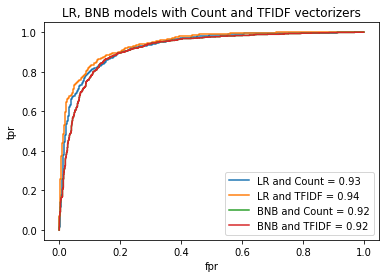

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

lr = LogisticRegression()
b_nb = BernoulliNB()

##LR and count
lr.fit(count_X_train_trans, Y_train)
preds = lr.predict_proba(count_X_test_trans)
preds = preds[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'LR and Count = %0.2f' % roc_auc)
plt.legend(loc='lower right')

##LR and tfid
lr.fit(tfid_X_train_trans, Y_train)
preds = lr.predict_proba(tfid_X_test_trans)
preds = preds[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'LR and TFIDF = %0.2f' % roc_auc)
plt.legend(loc='lower right')

##b_nb and count
b_nb.fit(count_X_train_trans, Y_train)
preds = b_nb.predict_proba(count_X_test_trans)
preds = preds[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'BNB and Count = %0.2f' % roc_auc)
plt.legend(loc='lower right')

##b_nb and tfid
b_nb.fit(tfid_X_train_trans, Y_train)
preds = b_nb.predict_proba(tfid_X_test_trans)
preds = preds[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'BNB and TFIDF = %0.2f' % roc_auc)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('LR, BNB models with Count and TFIDF vectorizers')
plt.legend(loc='lower right')

Which model do you think does a better job? Why? Explain in no more than a paragraph.

The binomial Naive Bayes model assumes the features (ie: the words) are conditionally independent given the rating. This is not the case since positive reviews likely contain positive words that are grouped together. Furthermore, logistic regression minimizes the error for predicting the training target variable. Therefore, it is expected that logistic regression has higher AUC and does a better job overall. As seen above, this is the case.


Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

Naive Bayes with the CountVectorizer classifier and naive Bayes with TfidfVectorizer performas equally. CountVectorizer counts the word frequencies and populates a sparse matrix with these frequences. TfidfVectorizer creates a matrix with the product of two terms: term frequency * inverse document frequency. Term frequency is equivalent to the CountVectorizer operation. Inverse document frequency = $log_e$(Total number of documents / Number of documents with term t in it). The data is composed of positive or negative reviews and these reviews are likely composed of key mutual exclusive words expressing the sentiment of the review. The dataset contains approximately half positive and half negative reviews, therefore $log_e$(Total number of documents / Number of documents with term t in it) will likely be similar for positive reviews and negative reviews. Since TfidfVectorizer is approximately CountVectorizer scaled, it is reasonable that naive Bayes has the same result for these two classifiers.

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples were labeled positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [ ]:
##LR and tfid
lr.fit(tfid_X_train_trans, Y_train)
preds = lr.predict_proba(tfid_X_test_trans)

for X_t, p, Y_t in zip(X_test, preds, Y_test):
    if p != Y_t:
        if Y_t == 1:
            print(X_t, 'has been classified as ', p, 'and should be ', Y_t, '\n') 
    


**Reviews chose with explanation:** 


'The Ladies Man suffers a common problem among movies based on Saturday Night Live skits. And that is a sketch that usually succeeds in five minutes will not do so well in ninety minutes. Although this movie does have its laughs like Tim Meadows as Leon Phelps a sex-maniac straight out of the 70s and Will Ferrell as a wrestling-obsessed husband cuckolded by Leon. So this movie is funny enough but its no Waynes World!' has been classified as  0 and should be  1 

**Explanation:** This review contains the words "suffers", "problem", and "no" which have negative connotations. Overall, this review is luke-warm and the criticisms in the review push the review to be incorrectly classified as negative.

'I thought that for a first episode of a first series it did really well. It was really fun and i thought the actors was brilliant. I think it is a crime for anyone to say that is was bad because it looked the right time. i find it really annoying when people say that it wasnt historically correct because it is supposed to be a Saturday night entertainment show not a boring history documentary so i think the costumes and settings were just right. A brilliant start and i am going to love what will come next!! I have spoken to many people at my school and they love the show! we all think that it is brilliant entertainment and it has great stories to go with it.' has been classified as  0 and should be  1 

**Explanation:** This review contains the words "crime", "bad", "boring", and "annoying" which have negative connotations. The review addresses the comments negative reviews which introduces these negative words.

'...........as I was when I saw this movie) I will never watch this movie again not because it is a bad movie but because it scared me so much! As I said I was 14 when my English teacher decided to show it to us; the reason for this is that we had read an extract from the book. All the girls in my class were TERRIFIED when the Woman in Black comes through the window and floats over Kidds bed although just before that there is something that also frightened us which was when Kidd finds the toy soldier underneath his pillow and he hears a childs voice say Its for you. That scene still haunts me to this day nearly 7 YEARS after I saw the film. If you are easily scared AVOID THIS FILM!!!!!!!!' has been classified as  0 and should be  1 

**Explanation:** This review contains the words "never", "bad", "terrified", "avoid, and "frightened" which have negative connotations. The review is about a horror movie which has strong negative emotions associated to the film. A film that is "good" if it has negative emotions associated is more likely to be incorrectly classified.

'Was the script more fitting for a 30 minute sitcom? Yes but they still make it work! I thought the actors did a fantastic job with an otherwise bland script especially Jack Black and Christopher Walken. Most people on the board seem to really hate this film. I personally cant see how that could be but Envy is just one of those film that you either love it or hate it. Much like Napoleon Dynamite and every Leslie Neilsen movie ever made. You either think its one of the worst movies ever made or one of the funniest. Dont avoid this movie because of the reviews. Watch it and see if youre one of the ones who really like it! If you do I guarantee its worth your money. If you dont like it... well now you know.' has been classified as  0 and should be  1 

**Explanation:** This review contains the words "hate", "worst", "dont" which have negative connotations. The review addresses concerns in other reviews which introduce negative words.

'Some of the acting was a bit suspect. I remember that asswipe Alexander Walker (Evening Standard critic yeah OK hes now dead) launched into a rant about this film saying it was a disgrace portraying NI Protestants as murderers. Now with respect to all NI protestants this film was loosely based on the Shankill Butchers (who were loyalists)and who roamed Belfast in the 1970s. Believe me they were not called butchers for nothing. my main moan about this film is the it shows no ray of light or hope its all doom & gloom i mean did the little girl at the end have to die. Maybe this sounds corny but it could have taken the tact that not all Prods & tiags are bad or wholly good either.' has been classified as  0 and should be  1

**Explanation:** This review contains the words "suspect", "asswipe", "dead", "disgrace", "moan", "doom", and "gloom". Most words in this review are strongly negative yet the rating is overall positive. The review has genuine criticisms and concerns and does not express many positive feeling about the film.
